In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
df = pd.read_csv('/content/electricity_bill_dataset.csv')

In [3]:
# Select features and target column
X = df[['MonthlyHours']].values  # Feature column
y = df['ElectricityBill'].values  # Target column
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

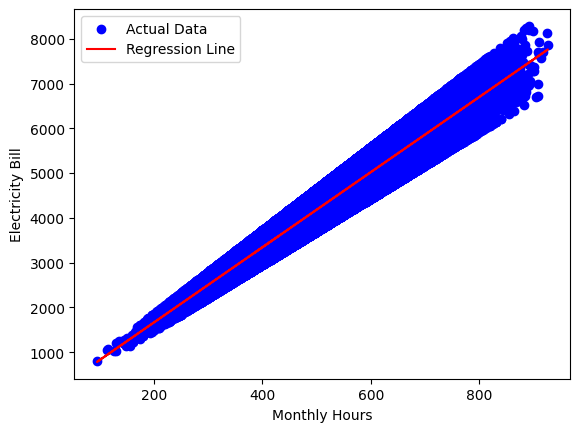

In [4]:

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict values
y_pred = model.predict(X_test)
# Plot results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Monthly Hours')
plt.ylabel('Electricity Bill')
plt.legend()
plt.show()

In [5]:

# Print model parameters
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: -13.280433605493272
Coefficient: 8.395145104776901


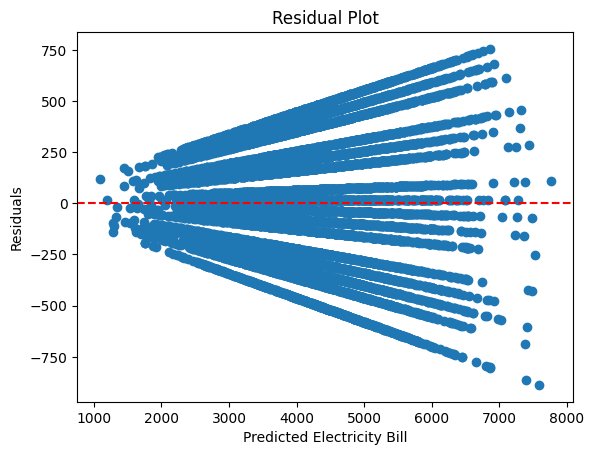

In [6]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Electricity Bill')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


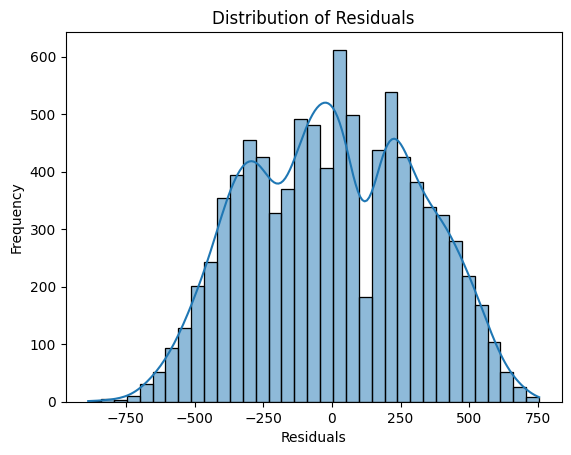

In [7]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Mean Squared Error (MSE): ₹{mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")


R-squared: 0.92
Mean Absolute Error (MAE): ₹256.33
Mean Squared Error (MSE): ₹93728.68
Root Mean Squared Error (RMSE): ₹306.15


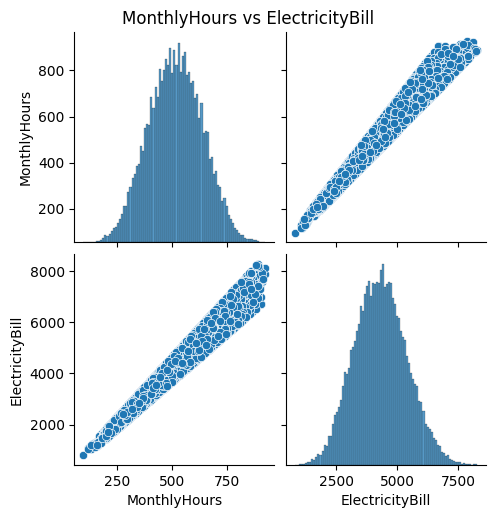

In [9]:
sns.pairplot(df[['MonthlyHours', 'ElectricityBill']])
plt.suptitle("MonthlyHours vs ElectricityBill", y=1.02)
plt.show()
